# 情感曲线可视化

## 预设

### 导入库

In [224]:
import sys
sys.path.append("..")
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
import matplotlib

### 全局参数

In [225]:
num = 6
DataFilePath = f'../data/episode{num}_sentiment.pkl'
SubDataFilePath = f'../data/subtitle{num}_sentiment.pkl'

### 全局设置

In [226]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zackyule/.pyenv/versions/3.11.0/envs/NLP_basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [227]:
def time_cut(df, time_column_name, time_step = 1000):
    bin = range(0, df[time_column_name].iloc[-1]+time_step, time_step)
    df.loc[:,f'{time_column_name}_group']=pd.cut(df[time_column_name],bin,right=False)
    return df

In [228]:
## data frame前后线性插值
def fill_na_to_df_by_interpolate(df):
    for column_name in df.columns:
        df[column_name].fillna(df[column_name].interpolate(),inplace=True)
    return df

## 数据读取

In [229]:
sentiment_data = pd.read_pickle(DataFilePath)
sub_sentiment_data = pd.read_pickle(SubDataFilePath)

In [230]:
sentiment_data = sentiment_data[sentiment_data['confidence'].notna()]
sub_sentiment_data = sub_sentiment_data[sub_sentiment_data['confidence'].notna()]

## 数据处理

### 滑动窗口

In [231]:
# sentiment_data['time'] = pd.to_timedelta(sentiment_data['progress_end'].apply(pd.offsets.Milli))
# sentiment_data['time'] = pd.to_timedelta(sentiment_data['progress'].apply(pd.offsets.Milli))

In [232]:
# sentiment_data.set_index('time', inplace=True)

In [233]:
# sentiment_data = sentiment_data[['confidence','negative_prob','positive_prob','sentiment']]

In [234]:
# sentiment_rolling_data = sentiment_data.rolling(window='30s').mean()

In [235]:
# sentiment_data[sentiment_data['confidence'].notna()]

### 区间划分

In [236]:
sentiment_data = time_cut(sentiment_data, 'progress', 30*1000)
sub_sentiment_data = time_cut(sub_sentiment_data, 'progress', 30*1000)

In [237]:
sentiment_mean = sentiment_data.groupby('progress_group')[['confidence','negative_prob','positive_prob','sentiment']].agg('mean')
sub_sentiment_mean = sub_sentiment_data.groupby('progress_group')[['confidence','negative_prob','positive_prob','sentiment']].agg('mean')

In [238]:
sentiment_count = sentiment_data.groupby('progress_group').agg('count')
sub_sentiment_count = sub_sentiment_data.groupby('progress_group').agg('count')

In [239]:
sentiment_statistics_data = sentiment_mean.join(sentiment_count.iloc[:,1])
sub_sentiment_statistics_data = sub_sentiment_mean.join(sentiment_count.iloc[:,1])

In [240]:
statistics_data = sentiment_statistics_data.join(sub_sentiment_statistics_data,lsuffix='_bullet', rsuffix='_subtitle')

### 滑动窗口

In [241]:
# sentiment_statistics_data = fill_na_to_df_by_interpolate(sentiment_statistics_data)

In [242]:
# sentiment_statistics_data = sentiment_statistics_data.rolling(window=5).mean()

## 数据展示

In [243]:
statistics_data#.dtypes#[sentiment_statistics_data['confidence'].notna()]

,confidence_bullet,negative_prob_bullet,positive_prob_bullet,sentiment_bullet,progress_bullet,confidence_subtitle,negative_prob_subtitle,positive_prob_subtitle,sentiment_subtitle,progress_subtitle
progress_group,,,,,,,,,,
"[0, 30000)",0.816654,0.437142,0.562858,1.121951,41,0.854779,0.194357,0.805643,1.6,41.0
"[30000, 60000)",0.758334,0.502615,0.497385,1.000000,17,0.836653,0.073506,0.926494,2.0,17.0
"[60000, 90000)",0.829239,0.434470,0.565530,1.238095,21,0.948335,0.495735,0.504265,1.0,21.0
"[90000, 120000)",0.831587,0.195692,0.804308,1.684211,38,0.861595,0.062282,0.937717,2.0,38.0
"[120000, 150000)",0.787452,0.340535,0.659465,1.400000,20,0.894111,0.274157,0.725843,1.5,20.0
...,...,...,...,...,...,...,...,...,...,...
"[3240000, 3270000)",0.885904,0.101442,0.898558,1.777778,9,0.546180,0.253532,0.746467,1.5,9.0
"[3270000, 3300000)",0.901896,0.083851,0.916149,1.800000,25,0.817526,0.082113,0.917887,2.0,25.0
"[3300000, 3330000)",0.869568,0.106824,0.893176,1.842697,89,0.716444,0.127600,0.872400,2.0,89.0


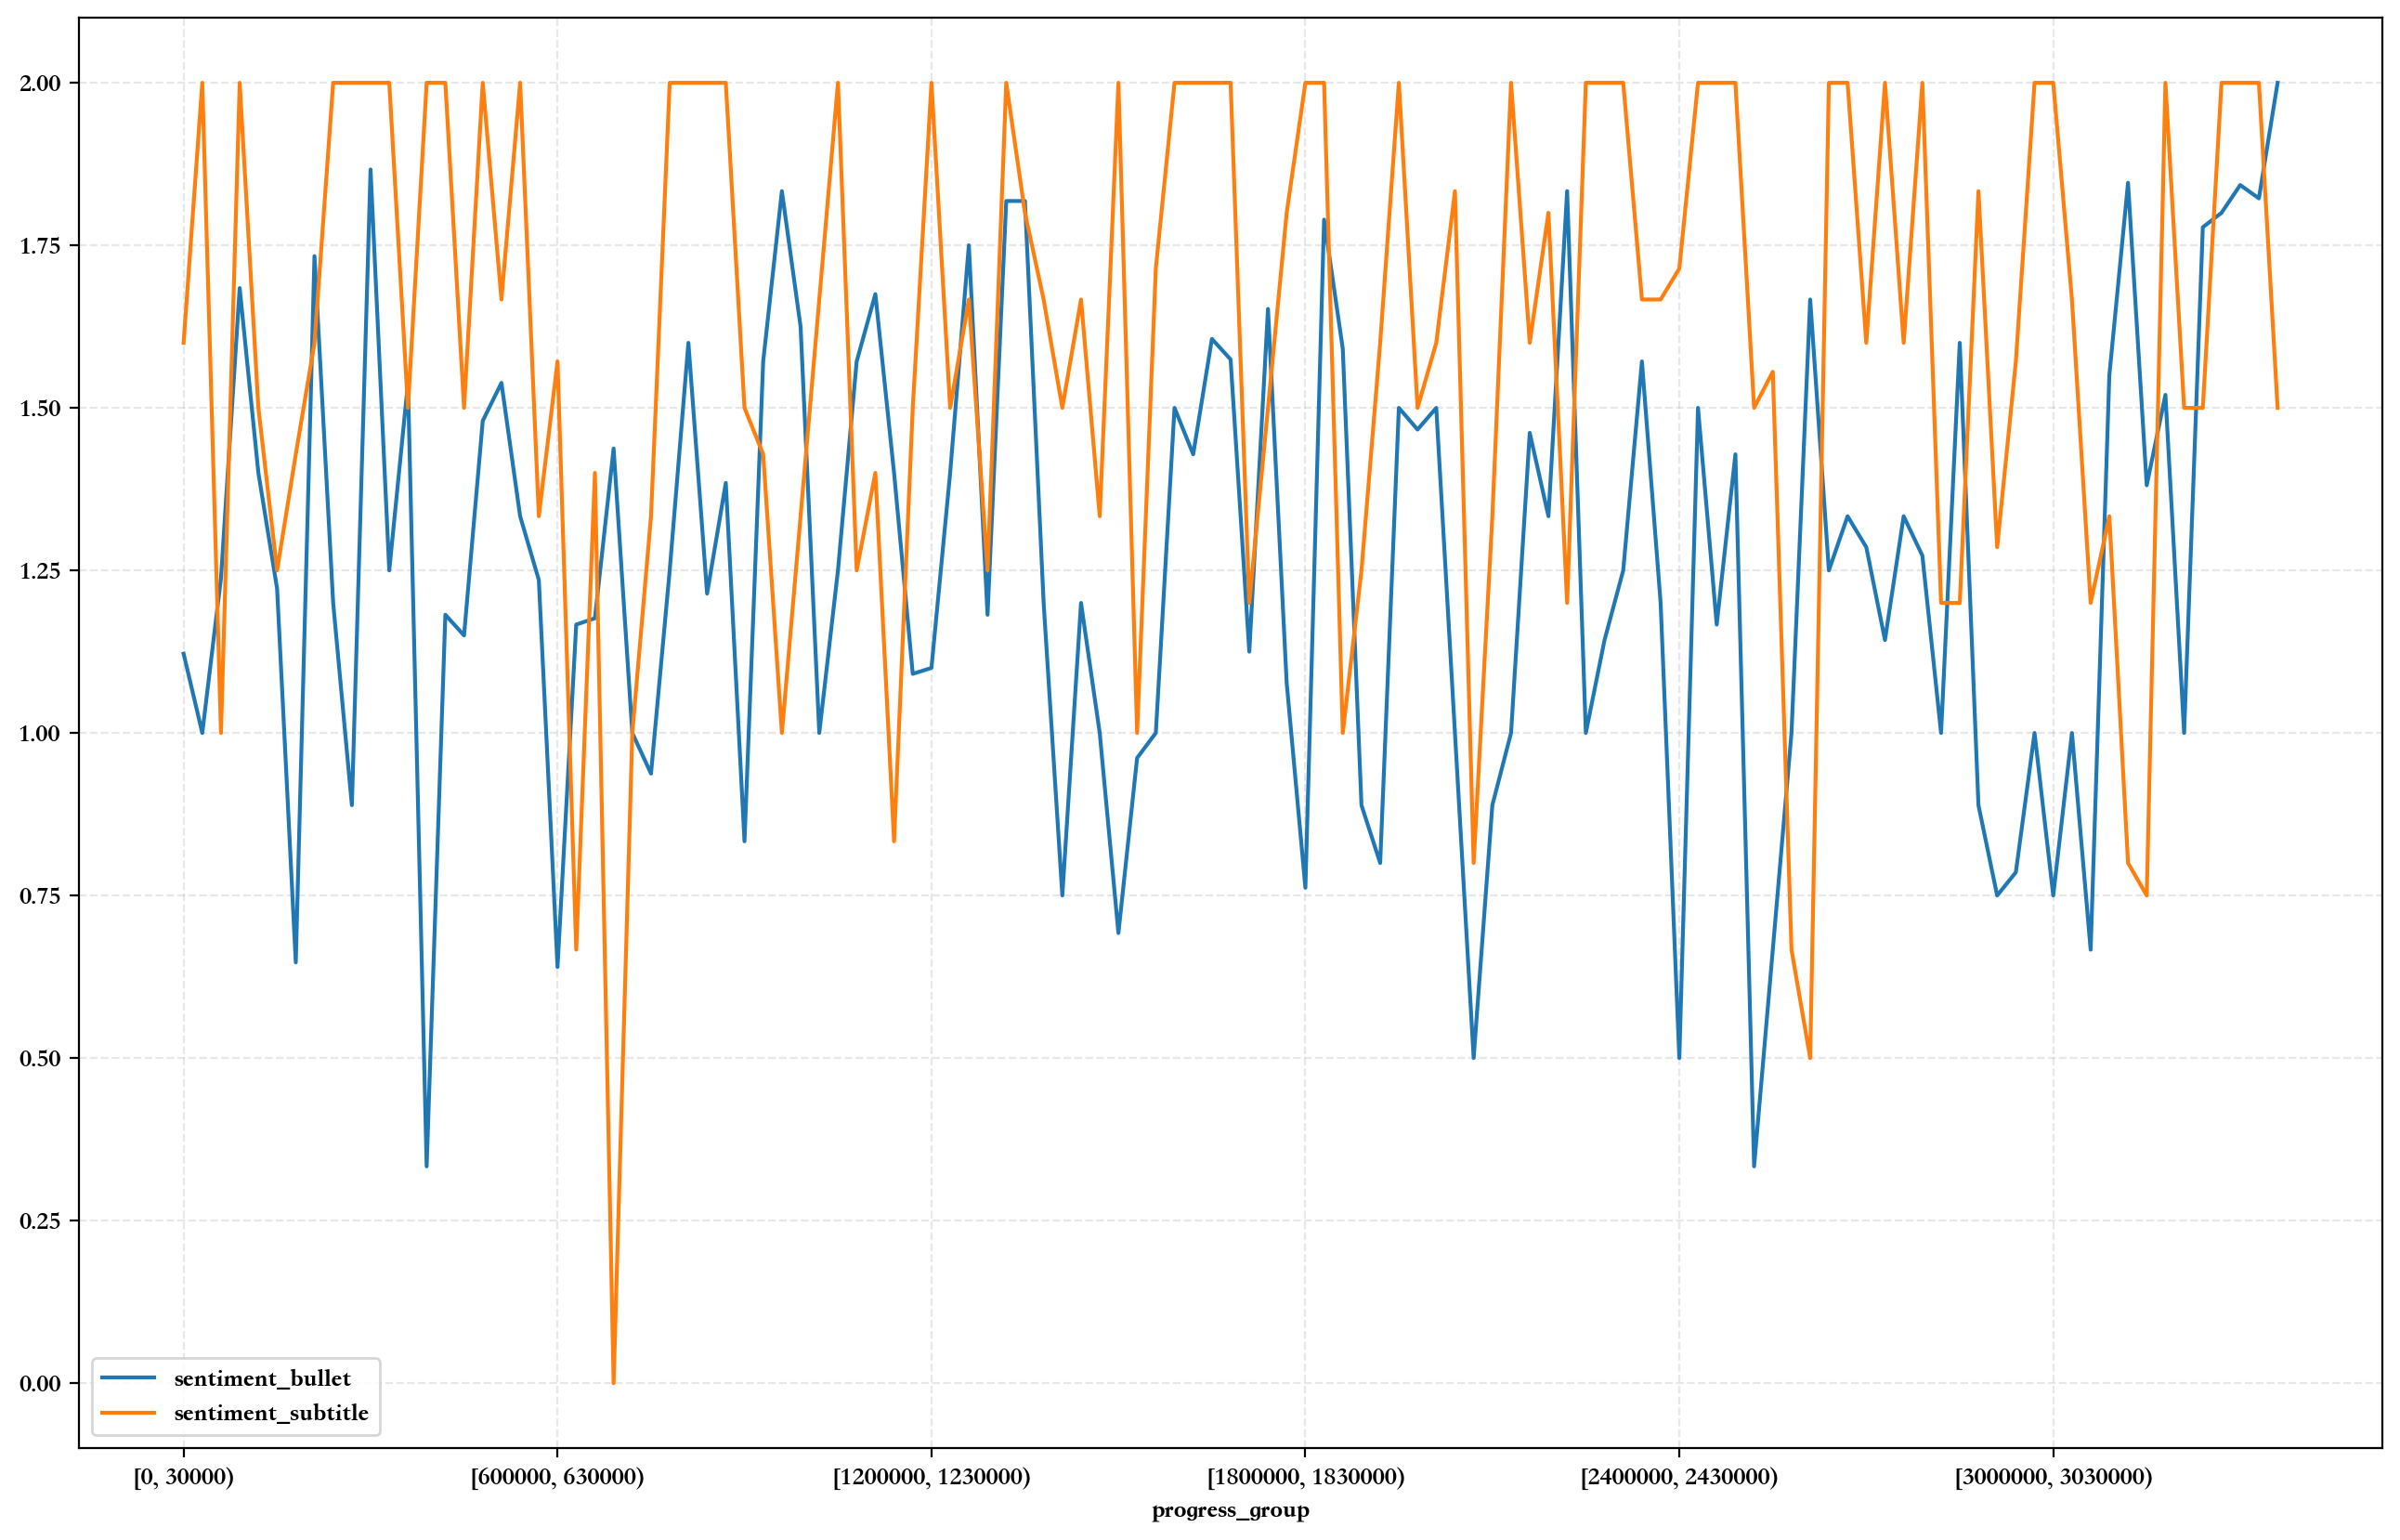

In [244]:
ax = statistics_data.loc[:, ['sentiment_bullet','sentiment_subtitle']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.show()

## 数据保存

## 测试&playground